In [11]:
import numpy as np
import pylab as plt
import scipy

def db(x):
    return 10*np.log10(x)

In [13]:
import scipy.signal

#d = np.fromfile(open("test_multiple_v2.fc32"), dtype=np.complex64)
#d = np.fromfile(open("six_channels_768000.fc32"), dtype=np.complex64)
#d = np.fromfile(open("neighbouring_ch_912000_3.fc32"), dtype=np.complex64)
d = np.fromfile(open("../data/10s_160377933.fc32"), dtype=np.complex64)
d = d[:250000]

f0 = 160.425e6    # Center frequency
Fs = 768e3        # Sampling rate
#Fs = 912e3        # Sampling rate
N_fft = 1000      # Number of FFT channels

# Generate array of channel frequencies
f = (np.fft.fftshift(np.fft.fftfreq(N_fft, 1/Fs)) + f0) / 1e6

# Time tag each sample
t = np.arange(len(d)) / Fs

# Reshape so we can do an FFT over an axis
d_fft = d.reshape((-1, N_fft))
D = np.fft.fftshift(np.fft.fft(d_fft, axis=1))

# Time tag each sample coming from a channel
T = np.arange(len(D)) / Fs * N_fft

# Now convert into power spectral density
# 1. Reshape to (N_timestep, N_int_per_timestep, N_fft)
# 2. Square
# 3. Sum over N_int_per_timestep axis
N_time_PSD = 250
PSD = (np.abs(D.reshape((N_time_PSD, -1, N_fft)))**2).mean(axis=1)

# Create overall spectrum
spec = PSD.mean(axis=0)

# Find peaks (note: I hand-tuned prominence)
p = scipy.signal.find_peaks(spec, prominence=0.05)[0]


In [18]:
# Extract the time series for each channel identified
t_kiwis = []
for idx in p:
    t_kiwis.append(D[:, idx])

# And extract the carrier frequencies
f_kiwis = f[p]

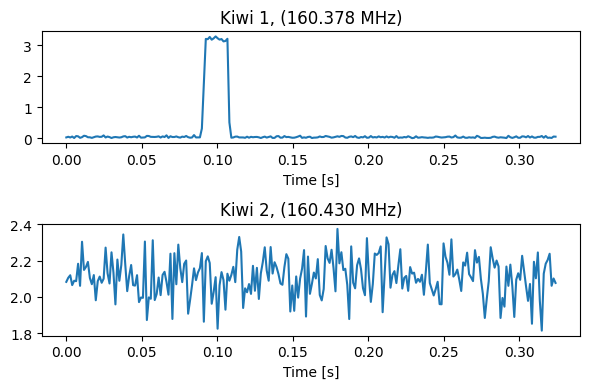

In [17]:
plt.figure(figsize=(6, len(p) * 2))

for ii, tk in enumerate(t_kiwis):
    plt.subplot(len(p), 1, ii+1)
    plt.plot(T, np.abs(tk))
    plt.title(f"Kiwi {ii+1}, ({f_kiwis[ii]:.3f} MHz)")
    plt.xlabel("Time [s]")
    
plt.tight_layout()